# CAO Points Analysis

***

In [1]:
import numpy as np
# Regular expressions
import re

# Convenient HTTP request.
import requests as rq

# Dates and Times
import datetime as dt

# Data Frame
import pandas as pd

# For downloading
import urllib.request as urlrq

# For drawing graphs
import matplotlib.pyplot as plt

In [2]:
# Get the current data and time
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%y%m%d_%H%M%S')

<br>

## 2021 CAO POINTS

http://www2.cao.ie/points/l8.php

***

In [3]:
# Fetch the CAO points url
resp = rq.get('http://www2.cao.ie/points/l8.php')
resp

<Response [200]>

# Save Original Data Set

***

In [4]:
# Create a file path for the original data
pathhtml = 'data/cao2021_' + nowstr + '.html'

# Error on Server

Technically, the server says we should decode as per:

'''
Content-Type: text/html; charset=iso-8859-1
'''

However, one line uses \x96 which isn't defined in iso-8859-1.

Therefore we use the similar decoding standard cp1252, which is very similar but includes #x96.

***

In [5]:
# The server uses the wrong encoding, fix it
original_encoding = resp.encoding

#Change to cp1252
resp.encoding = 'cp1252'

In [6]:
# Save the orignal html file
with open(pathhtml, 'w') as f:
    f.write(resp.text)

## Use regular expressions to slect lines we want

In [7]:
# Compile the regular expression for matching lines
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

### Loop through the lines of the repsonse

In [8]:
# The file path for the csv file
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process
no_lines = 0

# Open the csv file for writing
with open(path2021, 'w') as f:
    # Write a header row
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through the lines of the response content
    for line in resp.iter_lines():
        #Decode the line, using the wrong encoding
        dline = line.decode('cp1252')
        # Match only the lines we want - the ones representing courses.
        if re_course.fullmatch(dline):
            #Add one to the lines counter
            no_lines = no_lines + 1
            #The course code
            course_code = dline[:5]
            #The course Title
            course_title = dline[7:57].strip()
            # Round one points
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            #join the fields using a comma
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
           
            #Rejoin the substrings with commas inbetween
            f.write(','.join(linesplit) + '\n')
 # print      
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


#### NB: It was verified as of 03/11/2021 that there were 949 courses exactly in the CA 2021 points list

In [10]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [11]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

## 2020 points

http://www.cao.ie/index.php?page=points&p=2020

***

In [12]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

### Save Original File

In [13]:
# Create a file path for the original data
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [14]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_211209_174543.xlsx', <http.client.HTTPMessage at 0x1a14fd600d0>)

<br>

#### Load Spreadsheet using pandas

***

In [15]:
# Download and parse the Excel spreadsheet
df2020 = pd.read_excel(url2020, skiprows=10)

In [16]:
df2020 ['COURSE CODE2'].drop_duplicates()

0       AC120
1       AC137
2       AD101
3       AD102
4       AD103
        ...  
1459    WD208
1460    WD210
1461    WD211
1462    WD212
1463    WD230
Name: COURSE CODE2, Length: 1464, dtype: object

In [17]:
# spot check random row
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [18]:
# spot check last row
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [19]:
# Create a file path for the panda data.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [20]:
# Save pandas data frame to disk
df2020.to_csv(path2020)

<br>

## 2019 points

http://www2.cao.ie/points/lvl8_19.pdf

***

In [21]:
import urllib.request
import tabula

url2019 = 'http://www2.cao.ie/points/lvl8_19.pdf'
path = "data/cao2019_"+nowstr+".csv"

In [22]:
# Read pdf into a list of DataFrame 
# dfs = tabula.read_pdf(path, pages='all')
tabula.convert_into("http://www2.cao.ie/points/lvl8_19.pdf", path, output_format="csv", pages='all')

In [23]:
df2019 = pd.read_csv(path, encoding='cp1252')

In [24]:
df2 = pd.DataFrame(df2019[df2019['Course Code'].isnull()]['INSTITUTION and COURSE'].astype(str))
df1 = pd.DataFrame(df2019['Course Code'].astype(str).str[:2].unique().astype(str)[1:])
coursecode_and_names = list(zip(df1.values, df2.values))
df2019 = df2019[df2019['Course Code'].notna()]
coursecode_and_names


[(array(['AL'], dtype=object),
  array(['Athlone Institute of Technology'], dtype=object)),
 (array(['CW'], dtype=object),
  array(['Institute of Technology, Carlow'], dtype=object)),
 (array(['PC'], dtype=object),
  array(['Carlow College, St. Patrick`s'], dtype=object)),
 (array(['CR'], dtype=object),
  array(['Cork Institute of Technology'], dtype=object)),
 (array(['CK'], dtype=object),
  array(['University College Cork (NUI)'], dtype=object)),
 (array(['AC'], dtype=object), array(['American College'], dtype=object)),
 (array(['CT'], dtype=object), array(['CCT College Dublin'], dtype=object)),
 (array(['CM'], dtype=object),
  array(['Marino Institute of Education'], dtype=object)),
 (array(['DB'], dtype=object),
  array(['Dublin Business School'], dtype=object)),
 (array(['DC'], dtype=object),
  array(['Dublin City University'], dtype=object)),
 (array(['DT'], dtype=object),
  array(['Technological University Dublin City Campus'], dtype=object)),
 (array(['DL'], dtype=object),
  ar

In [25]:
##df2019 = pd.read_csv('data/cao2019_20211029_113930_edited.csv', sep='\t')

In [26]:
df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
1,AL801,Software Design with Virtual Reality and Gaming,304,328
2,AL802,Software Design with Cloud Computing,301,306
3,AL803,Software Design with Mobile Apps and Connected...,309,337
4,AL805,Network Management and Cloud Infrastructure,329,442
5,AL810,Quantity Surveying,307,349
...,...,...,...,...
960,WD200,Arts (options),221,296
961,WD210,Software Systems Development,271,329
962,WD211,Creative Computing,275,322
963,WD212,Recreation and Sport Management,274,311


</br>

## Concat and Join

***

In [27]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [28]:
courses2020 = df2020[['COURSE CODE2', 'COURSE TITLE']]
courses2020

,COURSE CODE2,COURSE TITLE
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [29]:
courses2020 = df2020[['COURSE CODE2', 'COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [30]:
courses2019 = df2019[['Course Code', 'INSTITUTION and COURSE']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
1,AL801,Software Design with Virtual Reality and Gaming
2,AL802,Software Design with Cloud Computing
3,AL803,Software Design with Mobile Apps and Connected...
4,AL805,Network Management and Cloud Infrastructure
5,AL810,Quantity Surveying
...,...,...
960,WD200,Arts (options)
961,WD210,Software Systems Development
962,WD211,Creative Computing
963,WD212,Recreation and Sport Management


In [31]:
allcourses = pd.concat([courses2021, courses2020, courses2019])
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
960,WD200,Arts (options)
961,WD210,Software Systems Development
962,WD211,Creative Computing
963,WD212,Recreation and Sport Management


In [32]:
allcourses[allcourses.duplicated()]

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
3,AD102,Graphic Design and Moving Image Design (portfo...
6,AD204,Fine Art (portfolio)
7,AD211,Fashion Design (portfolio)
...,...,...
960,WD200,Arts (options)
961,WD210,Software Systems Development
962,WD211,Creative Computing
963,WD212,Recreation and Sport Management


In [33]:
# returns a copy of the dataframe with the duplicates removedb
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
902,TL801,Animation Visual Effects and Motion Design
903,TL802,"TV, Radio and New Media"
904,TL803,Music Technology
907,TL812,Computing with Digital Media


In [34]:
#Find all extra copies of duplicate rows
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
960,WD200,Arts (options)
961,WD210,Software Systems Development
962,WD211,Creative Computing
963,WD212,Recreation and Sport Management


In [35]:
#Returns a copy of the data frame with duplicates removed - based only o cade
allcourses.drop_duplicates(subset=['code'], inplace=True)

In [36]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
892,SG441,Environmental Science
897,SG446,Applied Archaeology
904,TL803,Music Technology
907,TL812,Computing with Digital Media


</br>

## Join to the points

***

In [37]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [38]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

In [39]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [40]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [41]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [42]:
# Join 2020 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [43]:
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
1,AL801,304
2,AL802,301
3,AL803,309
4,AL805,329
5,AL810,307
...,...,...
960,WD200,221
961,WD210,271
962,WD211,275
963,WD212,274


In [44]:
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [45]:
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [46]:
allcourses['points_r1_2021'] = pd.to_numeric(allcourses['points_r1_2021'],errors = 'coerce')

In [47]:
allcourses['points_r1_2020'] = pd.to_numeric(allcourses['points_r1_2020'],errors = 'coerce')

In [48]:
allcourses['points_r1_2019'] = pd.to_numeric(allcourses['points_r1_2019'],errors = 'coerce')

In [49]:
allcourses = allcourses[allcourses['points_r1_2021'].notna()]

In [50]:
allcourses = allcourses[allcourses['points_r1_2020'].notna()]

In [51]:
allcourses = allcourses[allcourses['points_r1_2019'].notna()]

In [55]:
Points_increased = allcourses.where((allcourses["points_r1_2021"] > allcourses["points_r1_2020"]) & (allcourses["points_r1_2020"] > allcourses["points_r1_2019"]))
Points_increased = Points_increased[Points_increased['title'].notna()]
Points_increased

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL803,Software Design for Mobile Apps and Connected ...,350.0,337.0,309.0
AL810,Quantity Surveying,328.0,319.0,307.0
AL820,Mechanical and Polymer Engineering,327.0,308.0,300.0
AL838,Biotechnology,324.0,307.0,302.0
AL841,Athletic and Rehabilitation Therapy,477.0,430.0,423.0
...,...,...,...,...
WD117,Psychiatric Nursing,415.0,366.0,361.0
WD120,Intellectual Disability Nursing,390.0,377.0,338.0
WD144,Architecture,309.0,284.0,283.0


In [56]:
Points_decreased = allcourses.where((allcourses["points_r1_2021"] < allcourses["points_r1_2020"]) & (allcourses["points_r1_2020"] < allcourses["points_r1_2019"]))
Points_decreased = Points_decreased[Points_decreased['title'].notna()]
Points_decreased

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,303.0,304.0
CW088,Visual Communications and Design,270.0,274.0,309.0
CW208,Computer Games Development,272.0,279.0,281.0
CW238,Software Development,295.0,297.0,300.0
CW258,Cybercrime and IT Security,292.0,293.0,300.0
CW578,TV and Media Production,318.0,325.0,327.0
CW728,Product Design Innovation,246.0,252.0,286.0
CR370,Agri-Biosciences,368.0,397.0,408.0
CR425,International Business with Language,279.0,298.0,300.0


In [53]:
# maincolleges = ['CK', 'MH', 'LM', 'DC', 'GA' 'TR', 'DN']
# seperating the main colleges from all courses dataframe
cork_courses = allcourses[allcourses.index.str.match('CK')]
maynooth_courses = allcourses[allcourses.index.str.match('MH')]
limerick_courses = allcourses[allcourses.index.str.match('LM')]
dublincity_courses = allcourses[allcourses.index.str.match('DC')]
galway_courses = allcourses[allcourses.index.str.match('GA')]
trinity_courses = allcourses[allcourses.index.str.match('TR')]
unicollegedublin_courses = allcourses[allcourses.index.str.match('DN')]

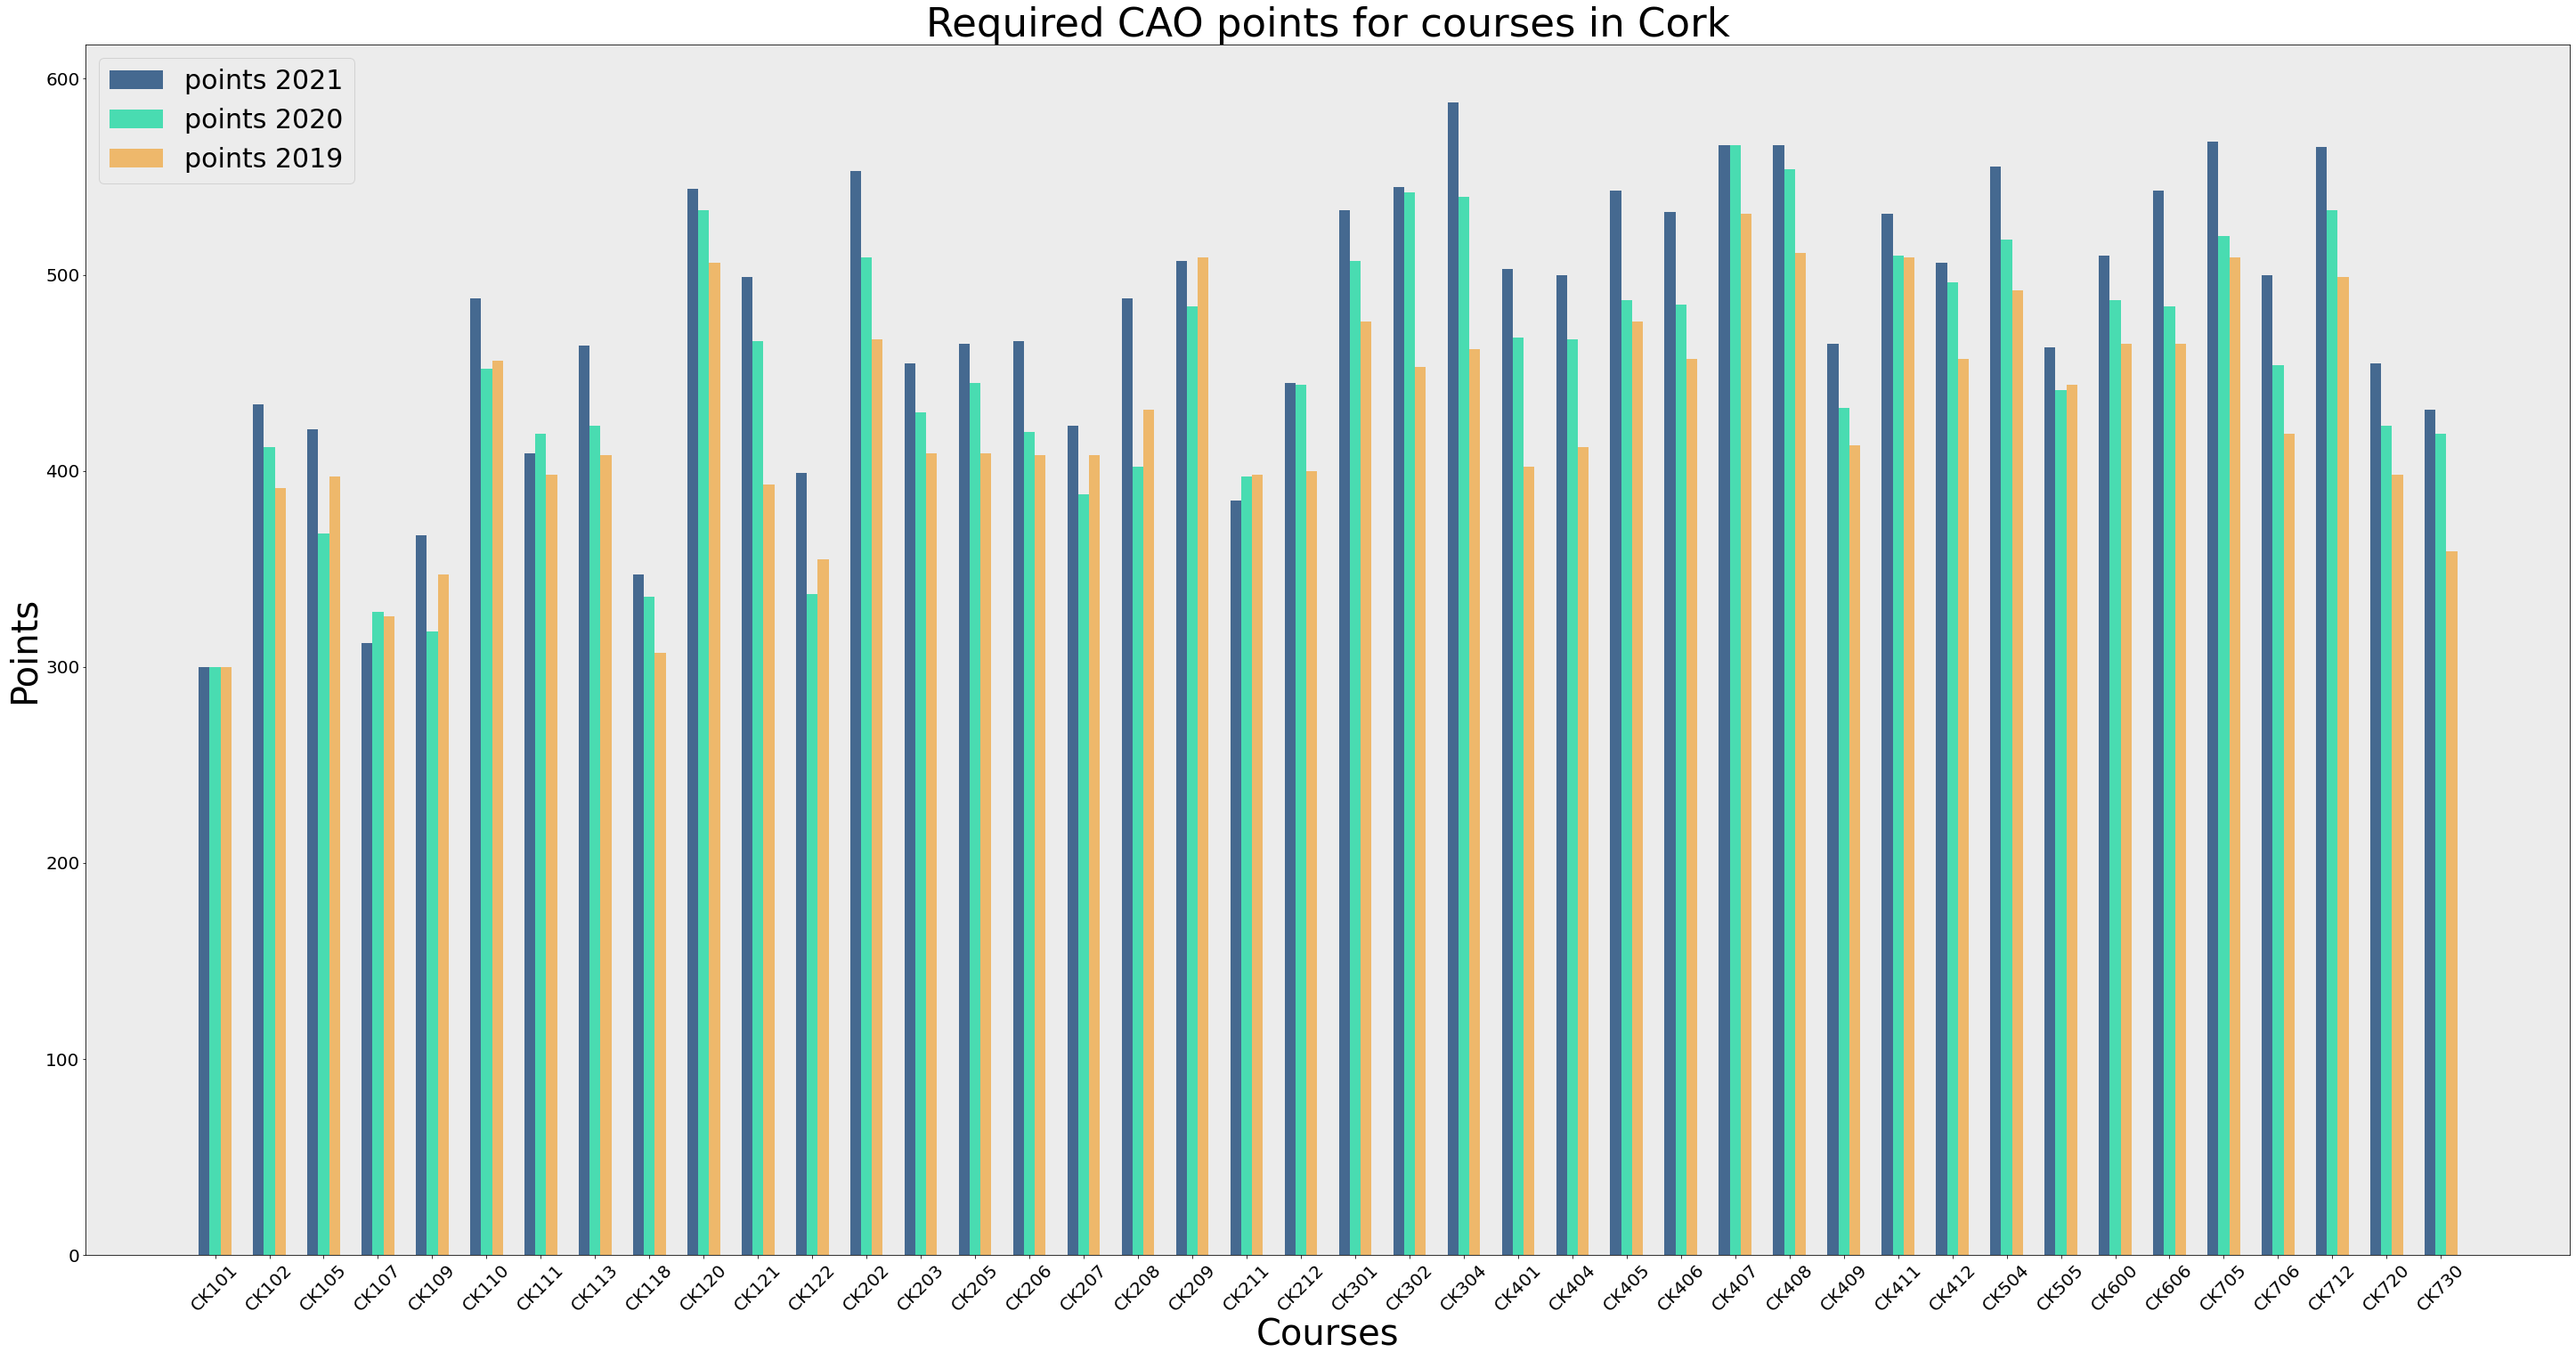

In [54]:
plt.rcParams["figure.figsize"] = (50,25)
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["axes.facecolor"] = "#ececec"

X = cork_courses.index.to_numpy()
X_axis = np.arange(len(X))

cork_points2021 = cork_courses['points_r1_2021'].to_numpy()
cork_points2020 = cork_courses['points_r1_2020'].to_numpy()
cork_points2019 = cork_courses['points_r1_2019'].to_numpy()
  
plt.bar(X_axis - 0.2, cork_points2021, width=0.2, label = 'points 2021',color="#456990")
plt.bar(X_axis, cork_points2020, 0.2, label = 'points 2020',color="#49DCB1")
plt.bar(X_axis + 0.2, cork_points2019, 0.2, label = 'points 2019',color="#EEB86B")

plt.xticks(X_axis, X)
plt.xlabel("Courses",fontsize=40)
plt.ylabel("Points",fontsize=40)
plt.title("Required CAO points for courses in Cork", fontsize=45)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.show()

In [78]:
#Whıch courses are requıres the most poınt to enter ın each college ın 2021?

course_codes = allcourses.index.astype(str).str[:2].unique()


course_codes

for i in range(len(course_codes)):
    try:
        tempArray = []
        tempArray.append(allcourses[allcourses.index.str.match(course_code[i])]['points_r1_2021'])
        print(tempArray[0][1])
        print(np.amax(tempArray))
    except ValueError:  
        pass
    

279.0
456.0
267.0
601.0


IndexError: index 1 is out of bounds for axis 0 with size 0